<a href="https://colab.research.google.com/github/SriRamaLakshmi50/FMML_projects-_labs/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

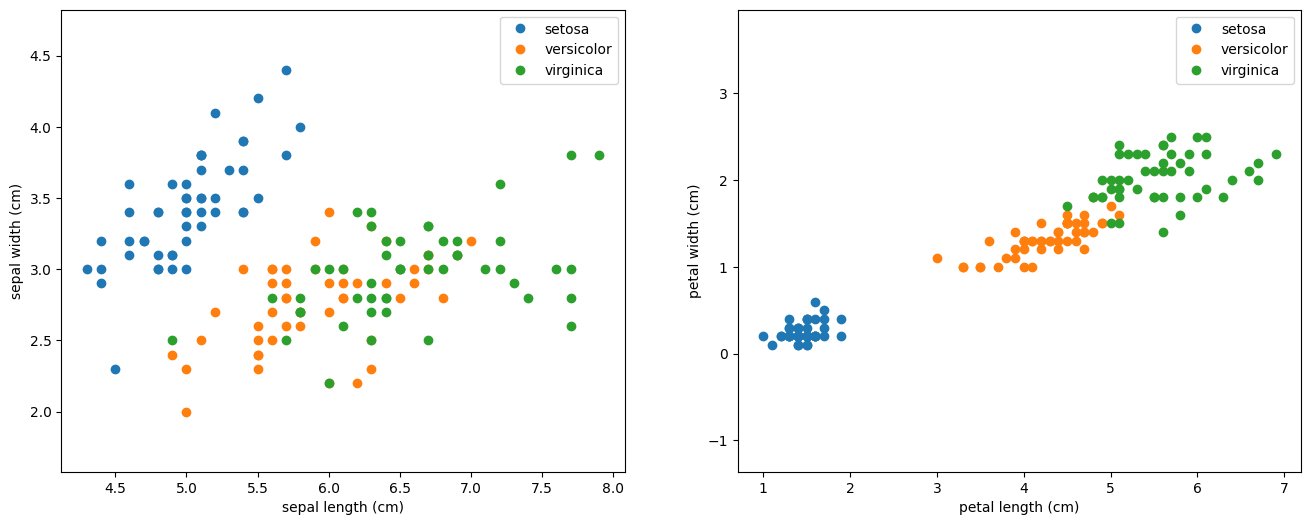

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 325.35it/s]


# Plot training progress

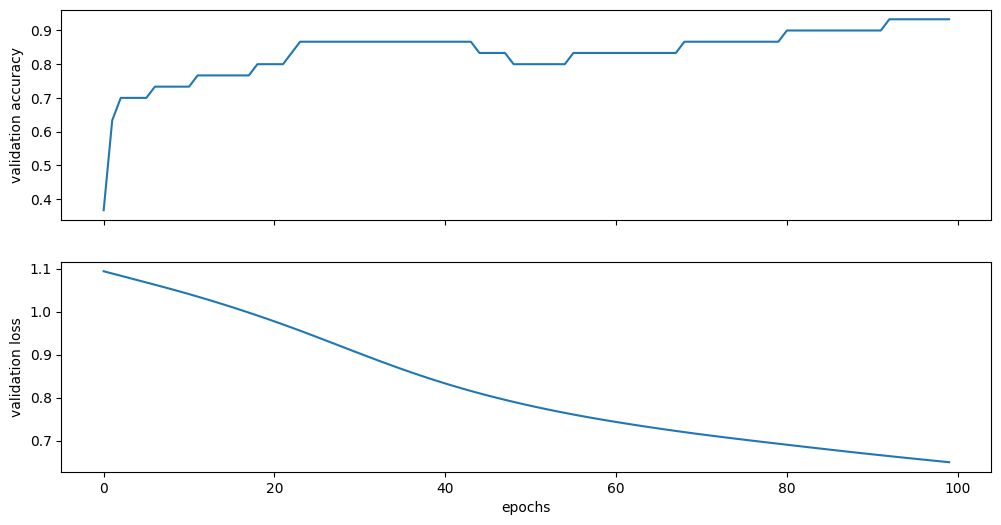

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

**1st answer**

 let's explore the impact of changing the number of hidden layers in a neural network. Increasing the number of hidden layers can potentially allow the network to learn more complex patterns and relationships in the data, but it also comes with the risk of overfitting and increased computational complexity.

Let's consider a simple feedforward neural network with one input layer, one output layer, and varying numbers of hidden layers. We'll use a hypothetical dataset for illustration:

Single Hidden Layer:
Input Layer (e.g., features of the dataset)
Hidden Layer (with a certain number of neurons)
Output Layer (e.g., classification or regression output)
Multiple Hidden Layers:
Input Layer
Hidden Layer 1
Hidden Layer 2
...
Hidden Layer N
Output Layer
Here are some potential effects of changing the number of hidden layers:

Increased Capacity: Adding more hidden layers allows the neural network to capture more complex relationships in the data, potentially leading to better performance, especially for tasks with intricate patterns.
Feature Representation: Each hidden layer can learn different levels of abstraction and representations of the input features. Deeper networks can learn hierarchical representations of features.
Overfitting: With more hidden layers, there's a risk of overfitting, especially if the model complexity exceeds the complexity of the data. Regularization techniques such as dropout or weight decay may be necessary to mitigate this risk.
Training Time: Deeper networks generally require more training time due to the increased number of parameters and computations involved. This can be a limiting factor, especially in resource-constrained environments.
Gradient Vanishing/Exploding: Deeper networks are prone to issues like vanishing or exploding gradients, which can hinder the training process. Techniques like batch normalization and careful weight initialization can alleviate these issues.
Hyperparameter Tuning: The number of hidden layers becomes another hyperparameter to tune, adding complexity to the model selection process.
In practice, the optimal number of hidden layers and neurons per layer depends on the specific dataset, task, and computational resources available. Experimentation and validation on a separate validation dataset or through cross-validation are essential for determining the best architecture for a given problem.

**2nd answer**

Certainly! Adjusting the number of neurons in the hidden layers can significantly impact the capacity and performance of a neural network. Here are some effects of changing the number of neurons in a hidden layer:

1.Model Capacity: Increasing the number of neurons in a hidden layer increases the model's capacity to learn complex patterns in the data. This can lead to improved performance, especially if the dataset is complex or contains intricate patterns. 2.Overfitting: However, increasing the number of neurons also increases the risk of overfitting, where the model learns to memorize the training data rather than generalize to unseen data. Regularization techniques such as dropout or L2 regularization can help mitigate this risk. Computational Complexity: More neurons in a hidden layer result in a higher number of parameters in the network, which increases computational complexity during training and inference. This may require more computational resources and longer training times. 3.Generalization: Too few neurons may lead to underfitting, where the model is unable to capture important patterns in the data. Finding the right balance of neurons is crucial for achieving good generalization performance on both the training and test datasets. 4.Feature Representation: The number of neurons in a hidden layer influences the network's ability to learn meaningful representations of the input features. Having more neurons allows the network to create richer and more diverse representations. 5.Hyperparameter Tuning: Like the number of hidden layers, the number of neurons per layer is a hyperparameter that requires tuning. Grid search, random search, or more sophisticated optimization techniques can be used to find the optimal number of neurons. In summary, adjusting the number of neurons in the hidden layers involves a trade-off between model capacity, overfitting, computational complexity, and generalization performance. Experimentation and validation are essential for determining the best architecture for a given problem.

**3rd answer**

import tensorflow as tf
from tensorflow.keras import layers, models

# Define the neural network architecture with Leaky ReLU activation function
def create_model_leaky_relu():
    model = models.Sequential([
        layers.Dense(64, activation=tf.nn.leaky_relu, input_shape=(input_shape,)),
        layers.Dense(32, activation=tf.nn.leaky_relu),
        layers.Dense(num_classes, activation='softmax')  # Output layer with softmax activation for classification
    ])
    return model

# Define the neural network architecture with ReLU activation function
def create_model_relu():
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(num_classes, activation='softmax')  # Output layer with softmax activation for classification
    ])
    return model

# Example usage
input_shape = 784  # Example input shape for a dataset
num_classes = 10   # Example number of classes for classification

# Create models with different activation functions
model_leaky_relu = create_model_leaky_relu()
model_relu = create_model_relu()

# Compile the models
model_leaky_relu.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_relu.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the models...
